# Working with Sampling Distributions (Airport Passenger Data)
Most statistical analysis involves working with distributions - usually of sample data.

## Sampling and Sampling Distributions
As we discussed earlier, when working with statistics, we usually base our calculations on a sample and not the full population of data. This means we need to allow for some variation between the sample statistics and the true parameters of the full population.

In the previous example, we knew the probability that a security search would be triggered was 25%, so it's pretty easy to calculate that the expected value for a random variable indicating the number of searches per 100 passengers is 25. What if we hadn't known the probability of a search? How could we estimate the expected mean number of searches for a given number of passengers based purely on sample data collected by observing passengers go through security?

### Creating a Proportion Distribution from a Sample
We know that the each passenger will either be searched or not searched, and we can assign the values ***0*** (for not searched) and ***1*** (for searched) to these outcomes. We can conduct a Bernoulli trial in which we sample 16 passengers and calculate the fraction (or *proportion*) of passengers that were searched (which we'll call ***p***), and the remaining proportion of passengers (which are the ones who weren't searched, and can be calculated as ***1-p***).

Let's say we record the following values for our 16-person sample:

    0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0

In this sample, there were 3 searches out of 16 passengers; which as a proportion is <sup>3</sup>/<sub>16</sub> or 0.1875. This is our proportion (or **p**); but because we know that this is based on a sample, we call it **p&#770;** (or p-hat). The remaining proportion of passengers is 1-p; in this case 1 - 0.1875, which is 0.8125.

The data itself is *qualitative* (categorical) - we're indicating "no search" or "search"; but because we're using numeric values (0 and 1), we can treat these values as numeric and create a binomial distribution from them - it's the simplest form of a binomial distribution - a Bernoulli distribution with two values.

Because we're treating the results as a numberic distribution, we can also calculate statistics like *mean* and *standard deviation*:

To calculate these, you can use the following formulae:

\begin{equation}\mu_{\hat{p}} = \hat{p}\end{equation}

\begin{equation}\sigma_{\hat{p}} = \sqrt{\hat{p}(1-\hat{p})}\end{equation}

The mean is just the value of **p&#770;**, so in the case of the passenger search sample it is 0.1875.

The standard deviation is calculated as:

\begin{equation}\sigma_{\hat{p}} = \sqrt{0.1875 \times 0.8125} \approx 0.39\end{equation}

We can use Python to plot the sample distribution and calculate the mean and standard deviation of our sample like this:

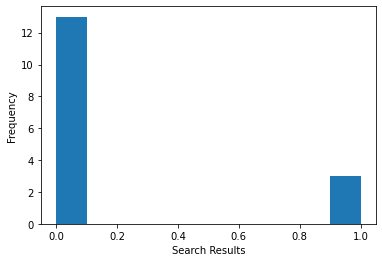

Mean: 0.1875
StDev: 0.3903123748998999


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

searches = np.array([0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0])

# Set up the graph
plt.xlabel('Search Results')
plt.ylabel('Frequency')
plt.hist(searches)
plt.show()
print('Mean: ' + str(np.mean(searches)))
print('StDev: ' + str(np.std(searches)))

When talking about probability, the *mean* is also known as the *expected value*; so based on our single sample of 16 passengers, should we expect the proportion of searched passengers to be 0.1875 (18.75%)?

Well, using a single sample like this can be misleading because the number of searches can vary with each sample. Another person observing 100 passengers may get a (very) different result from you. One way to address this problem is to take multiple samples and combine the resulting means to form a *sampling* distribution. This will help us ensure that the distribution and statistics of our sample data is closer to the true values; even if we can't measure the full population.

### Creating a Sampling Distribution of a Sample Proportion
So, let's collect mulitple 16-passenger samples - here are the resulting sample proportions for 12 samples:

| Sample | Result |
|--------|--------|
| p&#770;<sub>1</sub>| 0.1875 |
| p&#770;<sub>2</sub>| 0.2500 |
| p&#770;<sub>3</sub>| 0.3125 |
| p&#770;<sub>4</sub>| 0.1875 |
| p&#770;<sub>5</sub>| 0.1250 |
| p&#770;<sub>6</sub>| 0.3750 |
| p&#770;<sub>7</sub>| 0.2500 |
| p&#770;<sub>8</sub>| 0.1875 |
| p&#770;<sub>9</sub>| 0.3125 |
| p&#770;<sub>10</sub>| 0.2500 |
| p&#770;<sub>11</sub>| 0.2500 |
| p&#770;<sub>12</sub>| 0.3125 |

We can plot these as a sampling distribution like this:

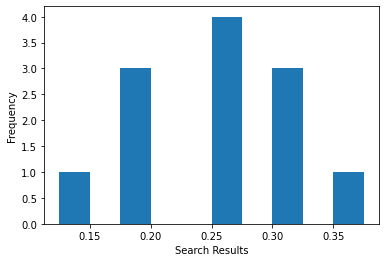

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

searches = np.array([0.1875,0.25,0.3125,0.1875,0.125,0.375,0.25,0.1875,0.3125,0.25,0.25,0.3125])

# Set up the graph
plt.xlabel('Search Results')
plt.ylabel('Frequency')
plt.hist(searches)
plt.show()

#### The Central Limit Theorem
You saw previously with the binomial probability distribution, with a large enough sample size (the *n* value indicating the number of binomial experiments), the distribution of values for a random variable started to form an approximately *normal* curve. This is the effect of the *central limit theorem*, and it applies to any distribution of sample data if the size of the sample is large enough. For our airport passenger data, if we collect a large enough number of samples, each based on a large enough number of passenger observations, the sampling distribution will be approximately normal. The larger the sample size, the closer to a perfect *normal* distribution the data will be, and the less variance around the mean there will be.

Run the cell below to see a simulated distribution created by 10,000 random 100-passenger samples:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2 = pd.DataFrame
n, p, s = 100, 0.25, 10000
df = pd.DataFrame(np.random.binomial(n,p,s)/n, columns=['p-hat'])
df

# Plot the distribution as a histogram
#means = df['p-hat']
#means.plot.hist(title='Simulated Sampling Distribution')  
#plt.show()
#print ('Mean: ' + str(means.mean()))
#print ('Std: ' + str(means.std()))

,p-hat
0,0.22
1,0.28
2,0.28
3,0.27
4,0.25
...,...
9995,0.21
9996,0.24
9997,0.26
9998,0.28


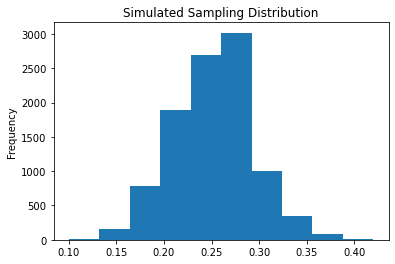

Mean: 0.25006400000000056
Std: 0.04266283998741319


In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

n, p, s = 100, 0.25, 10000
df = pd.DataFrame(np.random.binomial(n,p,s)/n, columns=['p-hat'])

# Plot the distribution as a histogram
means = df['p-hat']
means.plot.hist(title='Simulated Sampling Distribution')  
plt.show()
print ('Mean: ' + str(means.mean()))
print ('Std: ' + str(means.std()))

### Mean and Standard Error of a Sampling Distribution of Proportion
The sampling distribution is created from the means of multiple samples, and its mean is therefore the mean of all the sample means. For a distribution of proportion means, this is considered to be the same as **p** (the population mean). In the case of our passenger search samples, this is 0.25.

Because the sampling distribution is based on means, and not totals, its standard deviation is referred to as its *standard error*, and its formula is:

\begin{equation}\sigma_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}\end{equation}

In this formula, *n* is the size of each sample; and we divide by this to correct for the error introduced by the average values used in the sampling distribution. In this case, our samples were based on observing 16-passengers, so:

\begin{equation}\sigma_{\hat{p}} = \sqrt{\frac{0.25 \times 0.75}{16}} \approx 0.11\end{equation}

In our simulation of 100-passenger samples, the mean remains 0.25. The standard error is:

\begin{equation}\sigma_{\hat{p}} = \sqrt{\frac{0.25 \times 0.75}{100}} \approx 0.043\end{equation}

Note that the effect of the central limit theorem is that as you increase the number and/or size of samples, the mean remains constant but the amount of variance around it is reduced.

Being able to calculate the mean (or *expected value*) and standard error is useful, because we can apply these to what we know about an approximately normal distribution to estimate probabilities for particular values. For example, we know that in a normal distribution, around 95.4% of the values are within two standard deviations of the mean. If we apply that to our sampling distribution of ten thousand 100-passenger samples, we can determine that the proportion of searched passengers in 95.4% of the samples was between 0.164 (16.4%) and 0.336 (36.6%).

How do we know this?

We know that the mean is ***0.25*** and the standard error (which is the same thing as the standard deviation for our sampling distribution) is ***0.043***. We also know that because this is a *normal* distribution, ***95.4%*** of the data lies within two standard deviations (so 2 x 0.043) of the mean, so the value for 95.4% of our samples is 0.25 &plusmn; (*plus or minus*) 0.086.

The *plus or minus* value is known as the *margin of error*, and the range of values within it is known as a *confidence interval* - we'll look at these in more detail later. For now, run the following cell to see a visualization of this interval:

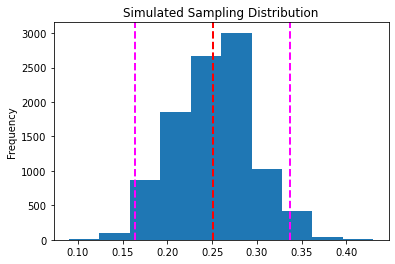

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

n, p, s = 100, 0.25, 10000
df = pd.DataFrame(np.random.binomial(n,p,s)/n, columns=['p-hat'])

# Plot the distribution as a histogram
means = df['p-hat']
m = means.mean()
sd = means.std()
moe1 = m - (sd * 2)
moe2 = m + (sd * 2)


means.plot.hist(title='Simulated Sampling Distribution')  

plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(moe1, color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(moe2, color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### Creating a Sampling Distribution of Sample Means
In the previous example, we created a sampling distribution of proportions; which is a suitable way to handle discrete values, like the number of passengers searched or not searched. When you need to work with continuous data, you use slightly different formulae to work with the sampling distribution.

For example, suppose we want to examine the weight of the hand luggage carried by each passenger. It's impractical to weigh every bag that is carried through security, but we could weigh one or more samples, for say, 5 passengers at a time, on twelve occassions. We might end up with some data like this:

| Sample | Weights |
|--------|---------|
| 1      | [4.020992,2.143457,2.260409,2.339641,4.699211] |
| 2      | [3.38532,4.438345,3.170228,3.499913,4.489557] |
| 3      | [3.338228,1.825221,3.53633,3.507952,2.698669] |
| 4      | [2.992756,3.292431,3.38148,3.479455,3.051273] |
| 5      | [2.969977,3.869029,4.149342,2.785682,3.03557] |
| 6      | [3.138055,2.535442,3.530052,3.029846,2.881217] |
| 7      | [1.596558,1.486385,3.122378,3.684084,3.501813] |
| 8      | [2.997384,3.818661,3.118434,3.455269,3.026508] |
| 9      | [4.078268,2.283018,3.606384,4.555053,3.344701] |
| 10     | [2.532509,3.064274,3.32908,2.981303,3.915995] |
| 11     | [4.078268,2.283018,3.606384,4.555053,3.344701] |
| 12     | [2.532509,3.064274,3.32908,2.981303,3.915995] |

Just as we did before, we could take the mean of each of these samples and combine them to form a sampling distribution of the sample means (which we'll call **<span style="text-decoration: overline;">X</span>**, and which will contain a mean for each sample, which we'll label x&#772;<sub>n</sub>):

| Sample | Mean Weight |
|--------|---------|
| x&#772;<sub>1</sub> | 3.092742  |
| x&#772;<sub>2</sub> | 3.7966726 |
| x&#772;<sub>3</sub> | 2.98128   |
| x&#772;<sub>4</sub> | 3.239479  |
| x&#772;<sub>5</sub> | 3.36192   |
| x&#772;<sub>6</sub> | 3.0229224 |
| x&#772;<sub>7</sub> | 2.6782436 |
| x&#772;<sub>8</sub> | 3.2832512 |
| x&#772;<sub>9</sub> | 3.5734848 |
| x&#772;<sub>10</sub> | 3.1646322 |
| x&#772;<sub>11</sub> | 3.5734848 |
| x&#772;<sub>12</sub> | 3.1646322 |

We can plot the distribution for the sampling distribution like this:

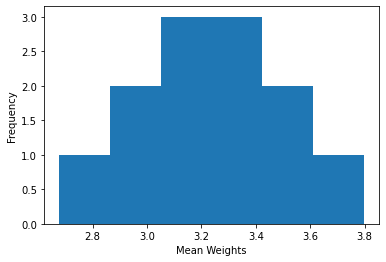

Mean: 3.2443954
Std: 0.2903283632058937


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

meanweights = np.array([3.092742,
                        3.7966726,
                        2.98128,
                        3.239479,
                        3.36192,
                        3.0229224,
                        2.6782436,
                        3.2832512,
                        3.5734848,
                        3.1646322,
                        3.5734848,
                        3.1646322])

# Set up the graph
plt.xlabel('Mean Weights')
plt.ylabel('Frequency')
plt.hist(meanweights, bins=6)
plt.show()

print('Mean: ' + str(meanweights.mean()))
print('Std: ' + str(meanweights.std()))

Just as before, as we increase the sample size, the central limit theorem ensures that our sampling distribution starts to approximate a normal distribution. Our current distribution is based on the means generated from twelve samples, each containing 5 weight observations. Run the following code to see a distribution created from a simulation of 10,000 samples each containing weights for 500 passengers:

>This may take a few minutes to run. The code is not the most efficient way to generate a sample distribution, but it reflects the principle that our sampling distribution is made up of the means from multiple samples. In reality, you could simulate the sampling by just creating a single sample from the ***random.normal*** function with a larger ***n*** value.

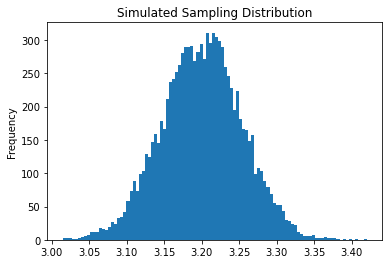

Sample Mean: 3.200214256500676
Sample StdDev: 1.1996797650446116
Sampling Mean: 3.200214256500673
Sampling StdErr: 0.053312612531458296


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mu, sigma, n = 3.2, 1.2, 500
samples = list(range(0, 10000))

# data will hold all of the sample data
data = np.array([])

# sampling will hold the means of the samples
sampling = np.array([])

# Perform 10,000 samples
for s in samples:
    # In each sample, get 500 data points from a normal distribution
    sample = np.random.normal(mu, sigma, n)
    data = np.append(data,sample)
    sampling = np.append(sampling,sample.mean())

# Create a dataframe with the sampling of means
df = pd.DataFrame(sampling, columns=['mean'])

# Plot the distribution as a histogram
means = df['mean']
means.plot.hist(title='Simulated Sampling Distribution', bins=100)  
plt.show()

# Print the Mean and StdDev for the full sample and for the sampling distribution
print('Sample Mean: ' + str(data.mean()))
print('Sample StdDev: ' + str(data.std()))
print ('Sampling Mean: ' + str(means.mean()))
print ('Sampling StdErr: ' + str(means.std()))

### Mean and Variance of the Sampling Distribution

The following variables are printed beneath the histogram:

- **Sample Mean**: This is the mean for the complete set of sample data - all 10,000 x 500 bag weights.
- **Sample StdDev**: This is the standard deviation for the complete set of sample data - all 10,000 x 500 bag weights.
- **Sampling Mean**: This is the mean for the sampling distribution - the means of the means!
- **Sampling StdErr**: This is the standard deviation (or *standard error*) for the sampling distribution

If we assume that **X** is a random variable representing every possible bag weight, then its mean (indicated as **&mu;<sub>x</sub>**) is the population mean (**&mu;**). The mean of the **<span style="text-decoration: overline;">X</span>** sampling distribution (which is indicated as **&mu;<sub>x&#772;</sub>**) is considered to have the same value. Or, as an equation:

\begin{equation}\mu_{x} = \mu_{\bar{x}}\end{equation}

In this case, the full population mean is unknown (unless we weigh every bag in the world!), but we do have the mean of the full set of sample observations we collected (**x&#772;**), and if we check the values generated by Python for the sample mean and the sampling mean, they're more or less the same: around 3.2.

To find the standard deviation of the sample mean, which is technically the *standard error*, we can use this formula:

\begin{equation}\sigma_{\bar{x}}  = \frac{\sigma}{\sqrt{n}}\end{equation}

In this formula, ***&sigma;*** is the population standard deviation and ***n*** is the size of each sample.

Since our the population standard deviation is unknown, we can use the full sample standard deviation instead:

\begin{equation}SE_{\bar{x}} \approx \frac{s}{\sqrt{n}}\end{equation}

In this case, the standard deviation of our set of sample data is around 1.2, and we have used 500 variables in each sample to calculate our sample means, so:

\begin{equation}SE_{\bar{x}} \approx \frac{1.2}{\sqrt{500}} = \frac{1.2}{22.36} \approx 0.053\end{equation}



## Confidence Intervals
A confidence interval is a range of values around a sample statistic within which we are confident that the true parameter lies. For example, our bag weight sampling distribution is based on samples of the weights of bags carried by passengers through our airport security line. We know that the mean weight (the *expected value* for the weight of a bag) in our sampling distribution is 3.2, and we assume this is also the population mean for all bags; but how confident can we be that the true mean weight of all carry-on bags is close to the value?

Let's start to put some precision onto these terms. We could state the question another way. What's the range of weights within which are confident that the mean weight of a carry-on bag will be 95% of the time? To calculate this, we need to determine the range of values within which the population mean weight is likely to be in 95% of samples. This is known as a *confidence interval*; and it's based on the Z-scores inherent in a normal distribution.

Confidence intervals are expressed as a sample statistic &plusmn; (*plus or minus*) a margin of error. To calculate the margin of error, you need to determine the confidence level you want to find (for example, 95%), and determine the Z score that marks the threshold above or below which the values that are *not* within the chosen interval reside. For example, to calculate a 95% confidence interval, you need the critical Z scores that exclude 5% of the values under the curve; with 2.5% of them being lower than the values in the confidence interval range, and 2.5% being higher. In a normal distribution, 95% of the area under the curve is between a Z score of &plusmn; 1.96. The following table shows the critical Z values for some other popular confidence interval ranges:

| Confidence  | Z Score |
|-------------|---------|
| 90%         | 1.645   |
| 95%         | 1.96    |
| 99%         | 2.576   |


To calculate a confidence interval around a sample statistic, we simply calculate the *standard error* for that statistic as described previously, and multiply this by the approriate Z score for the confidence interval we want.

To calculate the 95% confidence interval margin of error for our bag weights, we multiply our standard error of 0.053 by the Z score for a 95% confidence level, which is 1.96:

\begin{equation}MoE = 0.053 \times 1.96 = 0.10388 \end{equation}

So we can say that we're confident that the population mean weight is in the range of the sample mean &plusmn; 0.10388 with 95% confidence. Thanks to the central limit theorem, if we used an even bigger sample size, the confidence interval would become smaller as the amount of variance in the distribution is reduced. If the number of samples were infinite, the standard error would be 0 and the confidence interval would become a certain value that reflects the true mean weight for all carry-on bags:

\begin{equation}\lim_{n \to \infty} \frac{\sigma}{\sqrt{n}} = 0\end{equation}


In Python, you can use the *scipy.stats.**norm.interval*** function to calculate a confidence interval for a normal distribution. Run the following code to recreate the sampling distribution for bag searches with the same parameters, and display the 95% confidence interval for the mean (again, this may take some time to run):

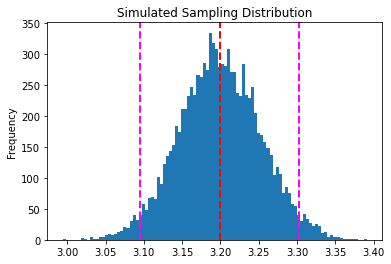

Sampling Mean: 3.1993038870802915
Sampling StdErr: 0.0529947266323613
95% Confidence Interval: (3.0954361315103176, 3.3031716426502653)


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mu, sigma, n = 3.2, 1.2, 500
samples = list(range(0, 10000))

# data will hold all of the sample data
data = np.array([])

# sampling will hold the means of the samples
sampling = np.array([])

# Perform 10,000 samples
for s in samples:
    # In each sample, get 500 data points from a normal distribution
    sample = np.random.normal(mu, sigma, n)
    data = np.append(data,sample)
    sampling = np.append(sampling,sample.mean())

# Create a dataframe with the sampling of means
df = pd.DataFrame(sampling, columns=['mean'])

# Get the Mean, StdDev, and 95% CI of the means
means = df['mean']
m = means.mean()
sd = means.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
means.plot.hist(title='Simulated Sampling Distribution', bins=100) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))